### Topics covered in this notebook 
- Reading an image
- Converting an image to grayscale
- Extract colour bands
- Resizing and Rescaling
- Cropping
- Blur - Gaussian, Motion and Defocus Blur
- Noise - Gaussian, Salt and Pepper, Uniform
- Canny Edge
- Erosion and Dilation
- Image Transformations - Translation, Rotation, Flipping, Brightness Adjustment, Negative Image

#### `Import the required libraries`

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

#### `Function to display the image`

In [2]:
def display(img,name):
    plt.title(name)
    plt.imshow(img,cmap='gray') 
    plt.axis('off')

#### `Read the image`

In [3]:
img = cv2.imread('Images/flower.jpg')
'''
cv2.imread('',x) -> x = -1,0,1
-1 : Loads image as such including alpha channel - RGBA 
0 : Loads image in grayscale mode
1 : Loads image in color mode - RGB
'''
type(img)

numpy.ndarray

In [4]:
img.shape

(1001, 1500, 3)

In [5]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert BGR to RGB

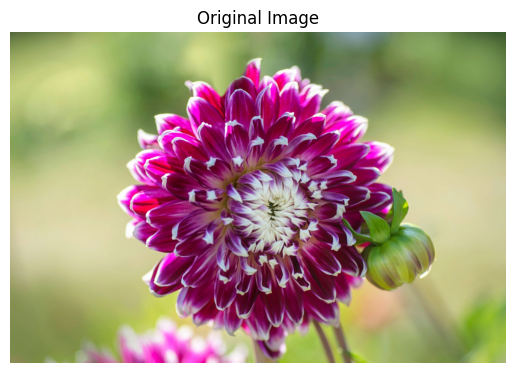

In [6]:
display(img,'Original Image')

#### `Convert to GrayScale`

In [7]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # convert RGB to Grayscale

In [8]:
gray.shape

(1001, 1500)

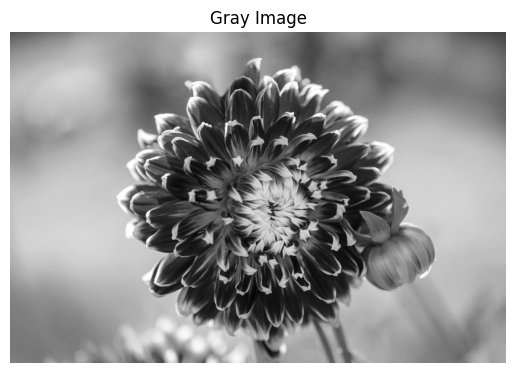

In [9]:
display(gray,'Gray Image')

#### `Extract colour bands`

In [91]:
img.shape

(1001, 1500, 3)

In [92]:
b, g, r = cv2.split(img) # Splitting the image into its channels
b.shape, g.shape, r.shape

((1001, 1500), (1001, 1500), (1001, 1500))

In [97]:
# img[::1]

In [98]:
# b[::1], g[::1], r[::1]

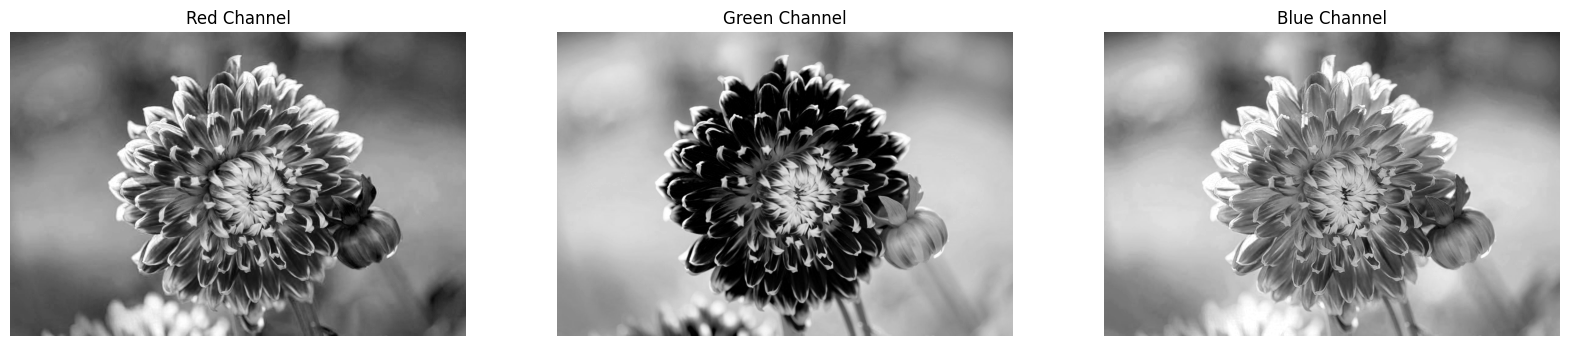

In [101]:
plt.figure(figsize=(20,10))

plt.subplot(131)
display(r,'Red Channel')

plt.subplot(132)
display(g,'Green Channel')

plt.subplot(133)
display(b,'Blue Channel')

plt.show()

#### `Resizing and Rescaling (Process of changing the size of an image while maintaining the aspect ratio)`

In [10]:
# change size of the image
img_resized = cv2.resize(gray, (512,512))
img_resized.shape

(512, 512)

In [11]:
new_size = (512,512)

In [12]:
fx = new_size[0]/gray.shape[1]
fy = new_size[1]/gray.shape[0]

# Scaling Matrix
M = np.float32([[fx,0,0],[0,fy,0]])

In [13]:
img_rescaled  = cv2.warpAffine(gray, M, new_size)

cv2.warpAffine() is a function in OpenCV that applies a specified affine transformation (like translation, rotation, scaling) to an image.

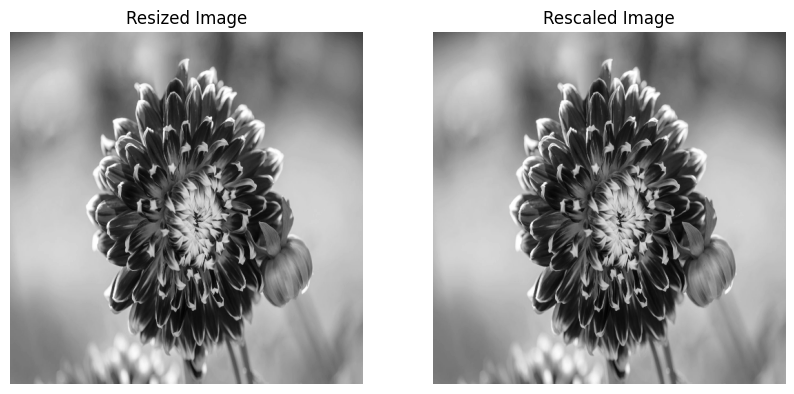

In [14]:
plt.figure(figsize=(10,10))

plt.subplot(121) 
display(img_resized,'Resized Image')

plt.subplot(122) 
display(img_rescaled,'Rescaled Image')

plt.show()

#### `Resize - Interpolation Techniques`

When an image is resized, the pixel grid changes, and new pixel values need to be estimated. These new pixel values are calculated using the values of nearby pixels and the chosen interpolation method.

In [65]:
gray.shape

(1001, 1500)

In [66]:
h,w = gray.shape[0], gray.shape[1]

In [89]:
def resize_and_plot(image_path):

    # Resize the image using different interpolation methods
    
    img_n = cv2.resize(img, (w//2, h//2), interpolation=cv2.INTER_NEAREST) # Nearest Interpolation
    img_n = cv2.resize(img_n, (w, h), interpolation=cv2.INTER_NEAREST)

    img_b = cv2.resize(img, (w//2, h//2), interpolation=cv2.INTER_LINEAR) # Linear Interpolation
    img_b = cv2.resize(img_b, (w, h), interpolation=cv2.INTER_LINEAR)

    img_c = cv2.resize(img, (w//2, h//2), interpolation=cv2.INTER_CUBIC) # Cubic Interpolation
    img_c = cv2.resize(img_c, (w, h), interpolation=cv2.INTER_CUBIC)
    
    img_l = cv2.resize(img, (w//2, h//2), interpolation=cv2.INTER_LANCZOS4) # Lanczos Interpolation
    img_l = cv2.resize(img_l, (w, h), interpolation=cv2.INTER_LANCZOS4)
    
    img_s = cv2.resize(img, (w//2, h//2), interpolation=cv2.INTER_LINEAR_EXACT) # Linear Exact Interpolation
    img_s = cv2.resize(img_s, (w, h), interpolation=cv2.INTER_LINEAR_EXACT)

    # Plot the original and resized images
    plt.figure(figsize=(12, 5))

    plt.subplot(2, 3, 1)
    display(gray,'Original Image')

    plt.subplot(2, 3, 2)
    display(img_n,'Nearest Interpolation')

    plt.subplot(2, 3, 3)
    display(img_b,'Linear Interpolation')

    plt.subplot(2, 3, 4)
    display(img_c,'Cubic Interpolation')

    plt.subplot(2, 3, 5)
    display(img_l,'Lanczos Interpolation')

    plt.subplot(2, 3, 6)
    display(img_s,'Linear Exact Interpolation')

    plt.show() 

The interpolation techniques are applied twice in the code to first downsize the image by half (i.e., reduce the width and height by half), and then upsize it back to its original dimensions. This is a common practice in image processing to demonstrate the effects of different interpolation methods.

When you downsize an image, you're reducing the number of pixels and potentially losing some detail. When you then upsize it back to its original size, you're creating new pixels. The values of these new pixels are estimated based on the surrounding pixels and the interpolation method used.

By applying this process of downsizing and upsizing with different interpolation methods, you can see how each method affects the quality of the resized image. Some methods will preserve more detail and result in a higher-quality image, while others may introduce artifacts or blur the image.

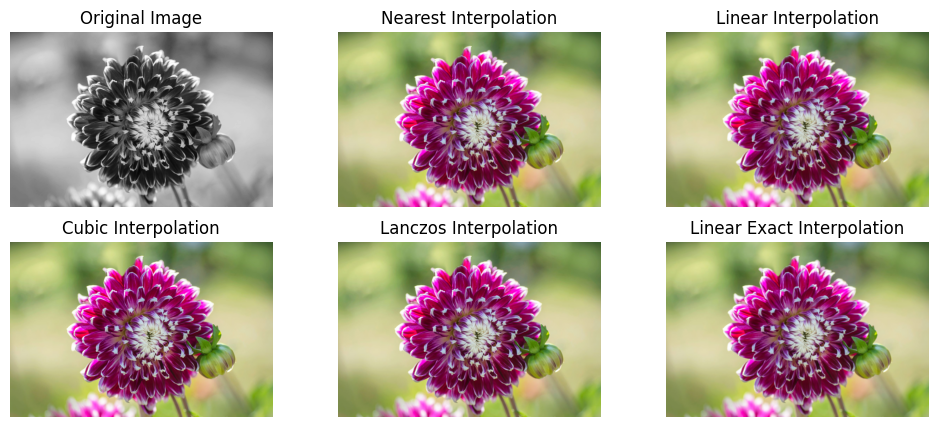

In [90]:
resize_and_plot(gray)

- Nearest-neighbor Interpolation:
    - Simplest method.
    - Assigns the value of the nearest pixel to the new pixel.
- Bilinear Interpolation:
    - Takes a weighted average of the four nearest pixels.
    - Provides smoother results compared to nearest-neighbor.
- Bicubic Interpolation:
    - Uses a 4x4 pixel neighborhood to compute a weighted average.
    - Generally results in higher image quality but requires more computational resources.
- Lanczos Interpolation:
    - Uses a sinc function to interpolate.
    - High-quality results, especially for downscaling.

#### `Image Cropping`

In [15]:
img_cropped = gray[50:450, 200:800] 

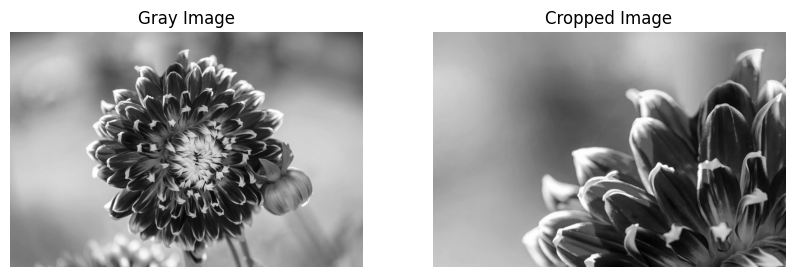

In [16]:
plt.figure(figsize=(10,10))

plt.subplot(121)
display(gray,'Gray Image')

plt.subplot(122)
display(img_cropped,'Cropped Image')

plt.show()

#### `Blurring Methods`

`Gaussian Blur`

In [17]:
img_gaussian_blur = cv2.GaussianBlur(gray, (11, 11), 0) 

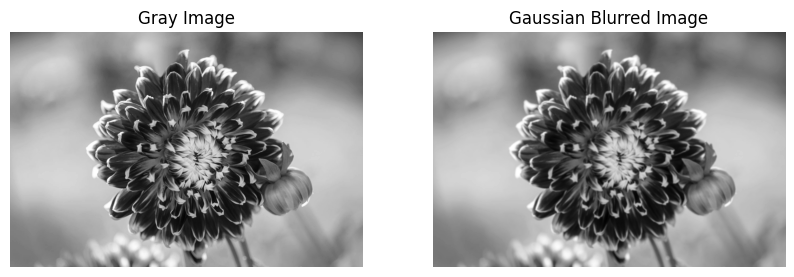

In [18]:
plt.figure(figsize=(10,10))

plt.subplot(121)
display(gray,'Gray Image')

plt.subplot(122)
display(img_gaussian_blur,'Gaussian Blurred Image')

plt.show()

`Motion Blur`

In [19]:
# Horizontal Motion Blur

kernel_size = 50
kernel_h = np.zeros((kernel_size, kernel_size))
# print(kernel_h) -> 50 X 50 matrix with all zeros

# print(int((kernel_size-1)/2)) -> 7th index
kernel_h[int((kernel_size-1)/2), :] = np.ones(kernel_size)
# print(kernel_h) -> 50 X 50 matrix with 7th row as 1s

kernel_h /= kernel_size
# print(kernel_h) -> 50 X 50 matrix with all elements divided by 15

horizontal_mb = cv2.filter2D(gray, -1, kernel_h) # filter2D is used to convolve the image with kernel_h, -1 is the depth(indicates that the output image will have the same datatype as that of the input image) of the output image

In [20]:
# Vertical Motion Blur

kernel_size = 50
kernel_v = np.zeros((kernel_size, kernel_size))
kernel_v[:, int((kernel_size-1)/2)] = np.ones(kernel_size)
# print(kernel_v) -> 50 X 50 matrix with 7th column as 1s

kernel_v /= kernel_size

vertical_mb = cv2.filter2D(gray, -1, kernel_v)

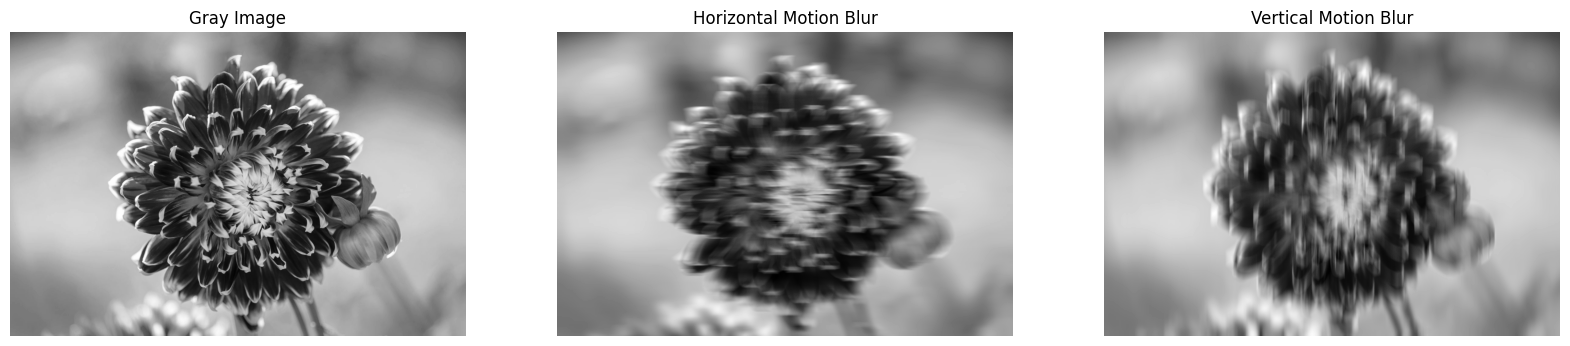

In [21]:
plt.figure(figsize=(20,10))

plt.subplot(131)
display(gray,'Gray Image')

plt.subplot(132)
display(horizontal_mb,'Horizontal Motion Blur')

plt.subplot(133)
display(vertical_mb,'Vertical Motion Blur')

plt.show()

`Defocus Blur`

In [22]:
img_defocus_blur = cv2.blur(gray, (11,11))

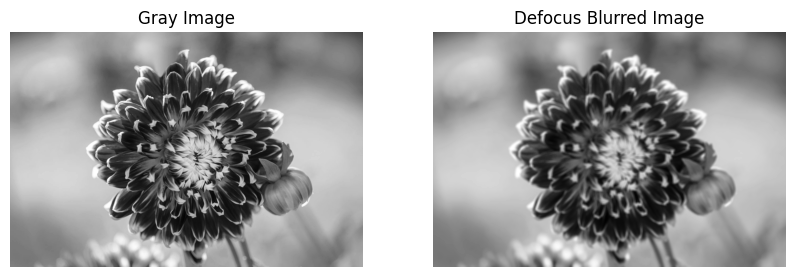

In [23]:
plt.figure(figsize=(10,10))

plt.subplot(121)
display(gray,'Gray Image')

plt.subplot(122)
display(img_defocus_blur,'Defocus Blurred Image')

plt.show()

#### `Adding Noises`

`Gaussian Noise`

In [24]:
# Generate 3 noisy images

mean, std_dev = 0, 75
gaussian_noise_01 = np.random.normal(mean, std_dev, gray.shape) # generating random numbers from a normal distribution with mean = 0 and standard deviation = 25
img_gaussian_noise_01 = gray + gaussian_noise_01
img_gaussian_noise_01 = np.clip(img_gaussian_noise_01, 0, 255)
img_gaussian_noise_01 = img_gaussian_noise_01.astype(np.uint8)

mean, std_dev = 2, 120
gaussian_noise_02 = np.random.normal(mean, std_dev, gray.shape)
img_gaussian_noise_02 = gray + gaussian_noise_02
img_gaussian_noise_02 = np.clip(img_gaussian_noise_02, 0, 255)
img_gaussian_noise_02 = img_gaussian_noise_02.astype(np.uint8)

mean, std_dev = 45, 90
gaussian_noise_03 = np.random.normal(mean, std_dev, gray.shape)
img_gaussian_noise_03 = gray + gaussian_noise_03
img_gaussian_noise_03 = np.clip(img_gaussian_noise_03, 0, 255)
img_gaussian_noise_03 = img_gaussian_noise_03.astype(np.uint8)

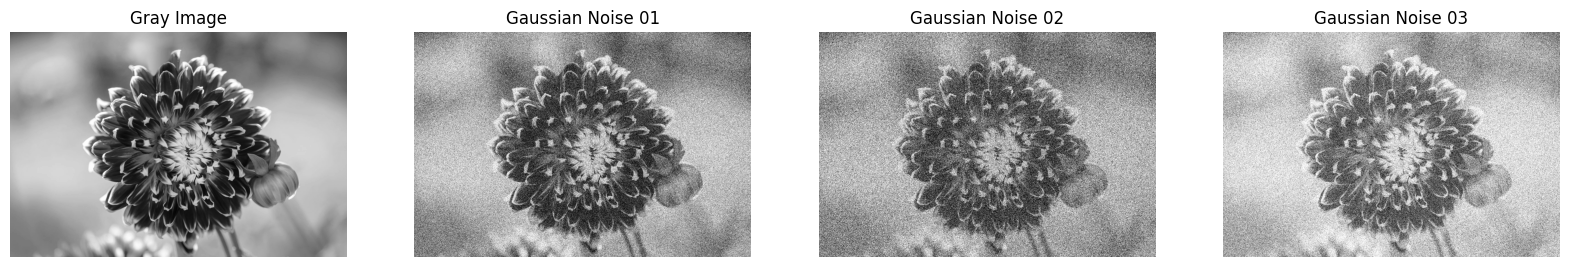

In [25]:
plt.figure(figsize=(20,10))

plt.subplot(141)
display(gray,'Gray Image')

plt.subplot(142)
display(img_gaussian_noise_01,'Gaussian Noise 01')

plt.subplot(143)
display(img_gaussian_noise_02,'Gaussian Noise 02')

plt.subplot(144)
display(img_gaussian_noise_03,'Gaussian Noise 03')

plt.show()

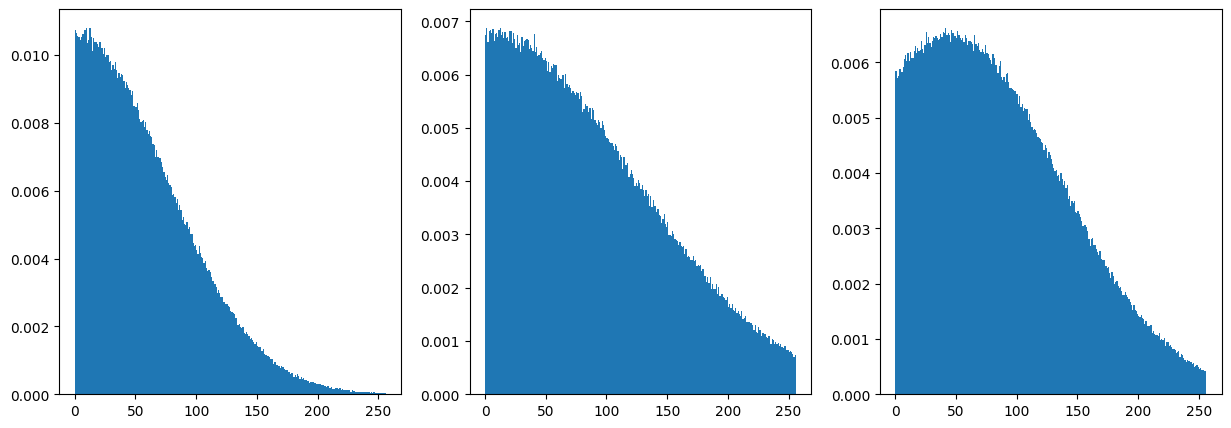

In [26]:
# Visulaize the normal distribution of the generated noise 
plt.figure(figsize=(15,5))
plt.subplot(131), plt.hist(gaussian_noise_01.ravel(), bins=256, range=(0, 256), density=True) 
plt.subplot(132), plt.hist(gaussian_noise_02.ravel(), bins=256, range=(0, 256), density=True)
plt.subplot(133), plt.hist(gaussian_noise_03.ravel(), bins=256, range=(0, 256), density=True)
plt.show()

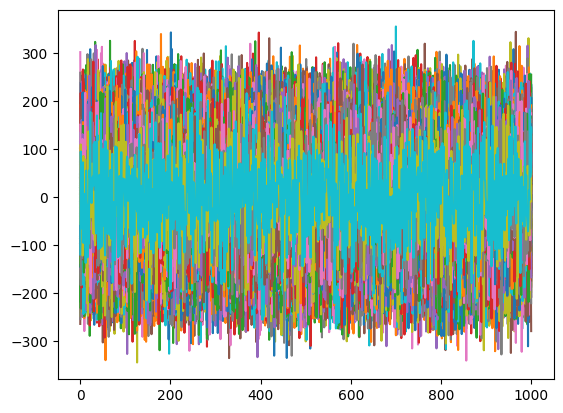

In [27]:
# plot gaussian_noise_01
plt.plot(gaussian_noise_01)
plt.show()

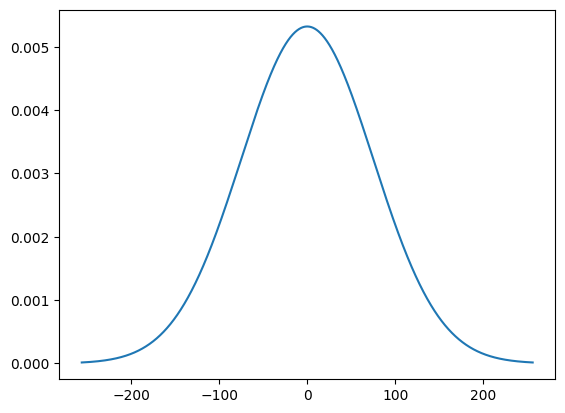

In [28]:
# plot normal distribution with mean = 0 and std_dev = 75
mean, std_dev = 0, 75
x = np.linspace(-256, 256, 5000) # 5000 points between -256 and 256 
y = (1/(std_dev*np.sqrt(2*np.pi)))*np.exp(-0.5*((x-mean)/std_dev)**2) # normal distribution formula
plt.plot(x, y)
plt.show()

`Salt and Pepper Noise`

In [29]:
salt_pepper_image = np.copy(gray)
probability = 0.65 
salt_pepper_noise = np.random.random(salt_pepper_image.shape) # Generates an array of random values between 0 and 1 with the same shape as the image

In [30]:
salt_pepper_image[salt_pepper_noise < probability/2] = 255 
'''
This line is adding "salt" to the image. 
It's looking at the salt_pepper_noise array (which contains random values between 0 and 1) and finding where those values are less than 
half of the probability value. For all those locations, it's setting the corresponding pixel in salt_pepper_image to 255, which is white in a grayscale image. 
So, this line is randomly turning some pixels white.
'''
salt_pepper_image[salt_pepper_noise > 1 - probability/2] = 0

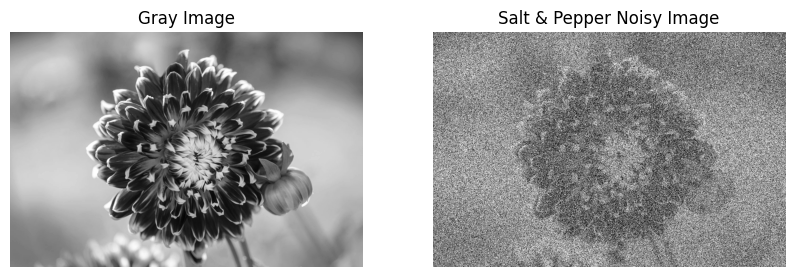

In [31]:
plt.figure(figsize=(10,10))

plt.subplot(121)
display(gray,'Gray Image')

plt.subplot(122)
display(salt_pepper_image,'Salt & Pepper Noisy Image')

plt.show()

`Uniform Noise`

In [62]:
noise_strength = 32
uniform_noise = np.random.uniform(-noise_strength, noise_strength, gray.shape).astype(np.uint8)

In [63]:
uniform_noisy_image = np.clip(gray + noise_strength, 0, 255).astype(np.uint8)

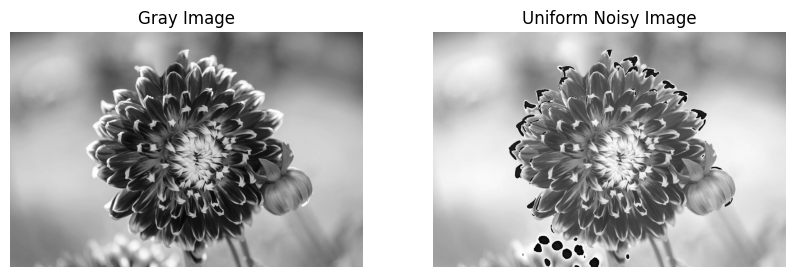

In [64]:
plt.figure(figsize=(10,10))

plt.subplot(121)
display(gray,'Gray Image')

plt.subplot(122)
display(uniform_noisy_image,'Uniform Noisy Image')

plt.show()

#### `Edge Cascade` - Canny Edge Detection Algorithm

1. Apply Gaussian filter to smooth the image and remove noise.
2. Find the intensity gradients of the image.
3. Apply non-maximum suppression to get rid of spurious response to edge detection.
4. Apply double threshold to determine potential edges.
5. Track edge by hysteresis: Finalize the detection of edges by suppressing all the other edges that are weak and not connected to strong edges.

In [36]:
img_canny = cv2.Canny(gray, 10, 150) # Canny edge detection -> 100 is the lower threshold and 200 is the upper threshold

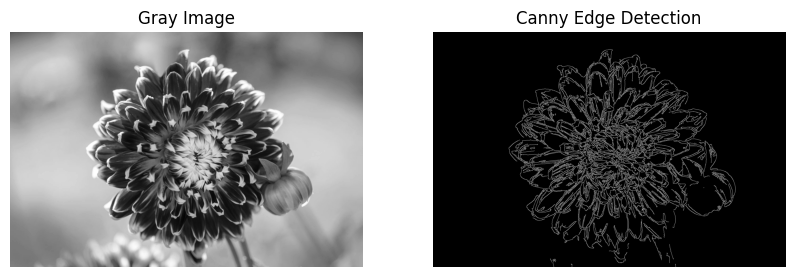

In [37]:
plt.figure(figsize=(10,10))

plt.subplot(121)
display(gray,'Gray Image')

plt.subplot(122)
display(img_canny,'Canny Edge Detection')

#### `Image Dilation`

Morphological operations are image processing operations that process an image based on its shape, using a structuring element.\
Image Dilation is a morphological operation applied to binary images to incrementally grow or expand the boundaries of regions of foreground pixels(foreground objects are the objects of interest that stand out from the background. These are typically the objects that you want to process or analyze. For example, in an image of a group of people standing in front of a landscape, the people could be considered the foreground objects and the landscape would be the background)

In [38]:
img_dilated = cv2.dilate(img_canny, (5,5), iterations=3) # dilate the image with a 5 X 5 kernel and 3 iterations

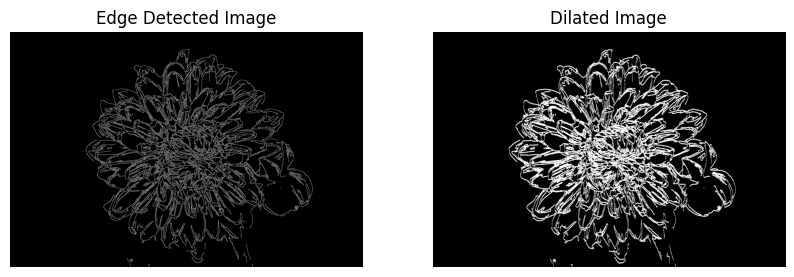

In [39]:
plt.figure(figsize=(10,10))

plt.subplot(121)
display(img_canny,'Edge Detected Image')

plt.subplot(122)
display(img_dilated,'Dilated Image')

#### `Image Eroding`

Image Eroding is a morphological operation applied to binary images to erode away the boundaries of foreground object

In [40]:
img_eroded = cv2.erode(img_dilated, (5,5), iterations = 2)

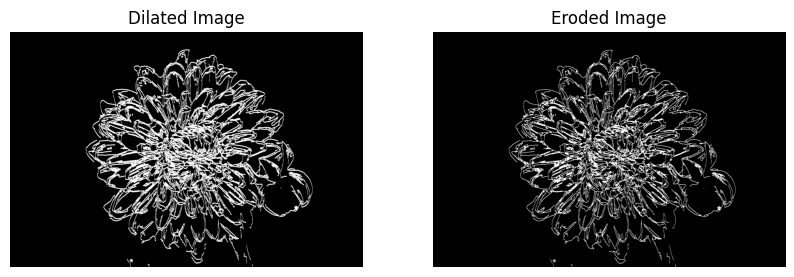

In [41]:
plt.figure(figsize=(10,10))

plt.subplot(121)
display(img_dilated,'Dilated Image')

plt.subplot(122)
display(img_eroded,'Eroded Image')

#### `Image Transformations`

`Image Translation`

In [42]:
m = np.float32([[1,0,150],[0,1,50]]) # translation matrix 
'''
translation matrix -> [[1,0,tx],[0,1,ty]]
tx -> translation along x-axis
ty -> translation along y-axis
'''
img_translated = cv2.warpAffine(gray, m, gray.shape)

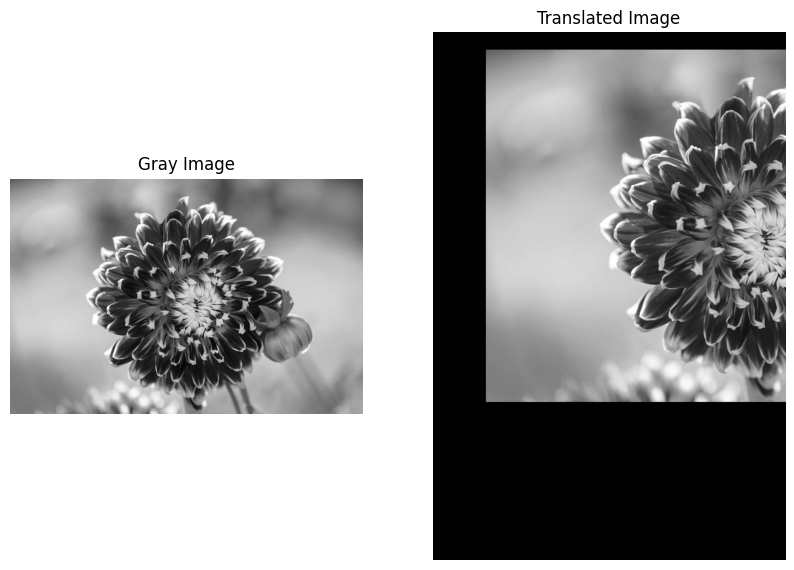

In [43]:
plt.figure(figsize=(10,10))

plt.subplot(121)
display(gray,'Gray Image')

plt.subplot(122)
display(img_translated,'Translated Image')

`Image Rotation`

In [44]:
img_rotated_01 = cv2.rotate(gray, cv2.ROTATE_90_CLOCKWISE)
img_rotated_02 = cv2.rotate(gray, cv2.ROTATE_90_COUNTERCLOCKWISE)
img_rotated_03 = cv2.rotate(gray, cv2.ROTATE_180)

In [45]:
m1 = cv2.getRotationMatrix2D((gray.shape[1]/2, gray.shape[0]/2), 45, 1)
m2 = cv2.getRotationMatrix2D((gray.shape[1]/2, gray.shape[0]/2), 95, 1)

In [46]:
img_rotated_04 = cv2.warpAffine(gray,m1,(gray.shape[1], gray.shape[0])) 
img_rotated_05 = cv2.warpAffine(gray,m2,(gray.shape[1], gray.shape[0])) 

cv2.warpAffine() is a function in OpenCV that applies a specified affine transformation (like translation, rotation, scaling) to an image.

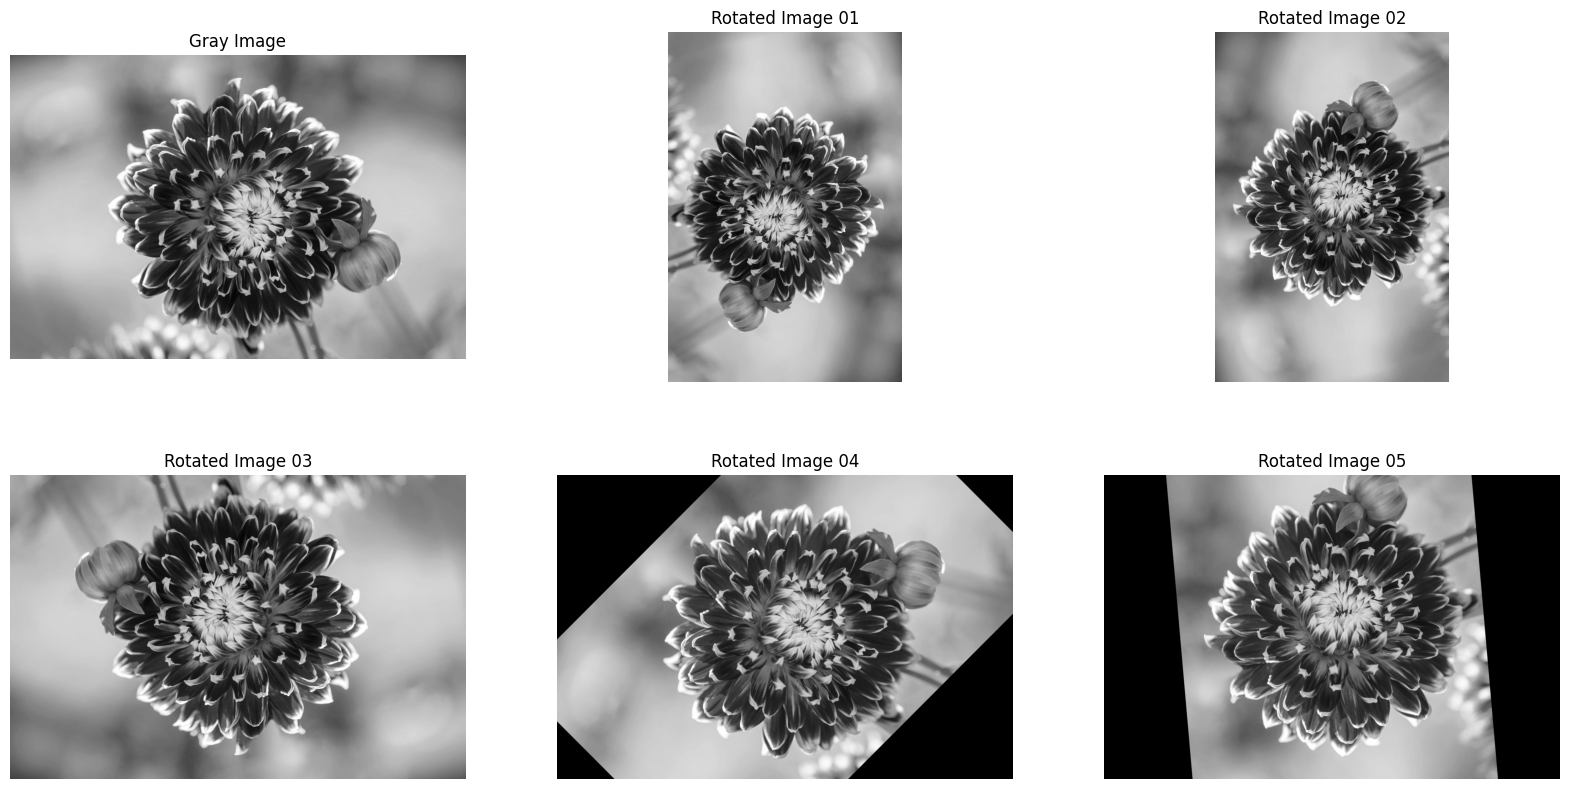

In [47]:
plt.figure(figsize=(20,10))

plt.subplot(231)
display(gray,'Gray Image')

plt.subplot(232)
display(img_rotated_01,'Rotated Image 01')

plt.subplot(233)
display(img_rotated_02,'Rotated Image 02')

plt.subplot(234)
display(img_rotated_03,'Rotated Image 03')

plt.subplot(235)
display(img_rotated_04,'Rotated Image 04')

plt.subplot(236)
display(img_rotated_05,'Rotated Image 05')

plt.show()

`Image Flipping`

In [48]:
img_flip = cv2.flip(gray,0)
'''
0 - flip vertically
1 - flip horizontally
-1 - flip both vertically and horizontally
'''

'\n0 - flip vertically\n1 - flip horizontally\n-1 - flip both vertically and horizontally\n'

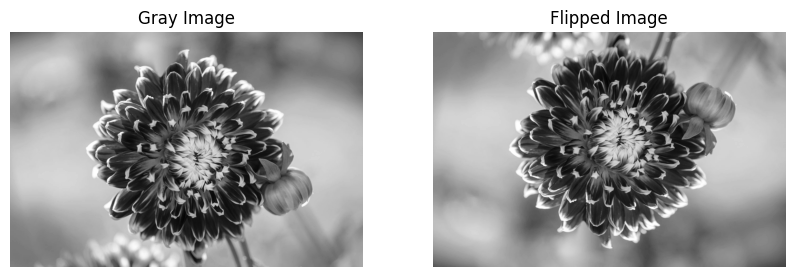

In [49]:
plt.figure(figsize=(10,10))

plt.subplot(121)
display(gray,'Gray Image')

plt.subplot(122)
display(img_flip,'Flipped Image')

`Brightness Adjustment`

convertScaleAbs - used to increase or decrease the contrast of an image

In [50]:
img_brightness = cv2.convertScaleAbs(gray,alpha=1.5,beta=0.5)

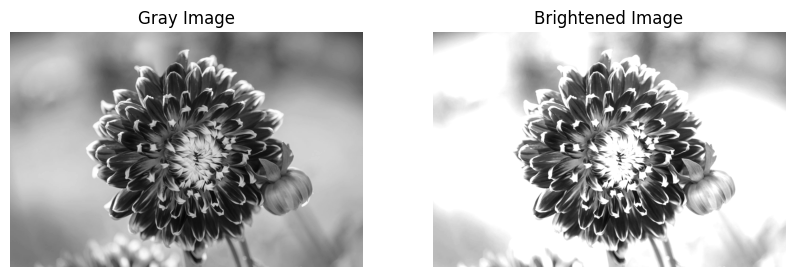

In [51]:
plt.figure(figsize=(10,10))

plt.subplot(121)
display(gray,'Gray Image')

plt.subplot(122)
display(img_brightness,'Brightened Image')

`Negative Image`

In [52]:
img_negative = cv2.bitwise_not(gray)

In [53]:
gray[::1], img_negative[::1]

(array([[ 92,  92,  92, ...,  77,  77,  77],
        [ 92,  92,  93, ...,  77,  77,  77],
        [ 93,  93,  93, ...,  77,  77,  77],
        ...,
        [133, 133, 133, ..., 172, 173, 174],
        [133, 133, 133, ..., 172, 173, 174],
        [133, 133, 134, ..., 173, 173, 174]], dtype=uint8),
 array([[163, 163, 163, ..., 178, 178, 178],
        [163, 163, 162, ..., 178, 178, 178],
        [162, 162, 162, ..., 178, 178, 178],
        ...,
        [122, 122, 122, ...,  83,  82,  81],
        [122, 122, 122, ...,  83,  82,  81],
        [122, 122, 121, ...,  82,  82,  81]], dtype=uint8))

In [54]:
178+77

255